# (a) Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# (b) Reading csv file and data cleaning

In [2]:
ds = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
ds

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
ds.shape

(100000, 9)

In [5]:
ds.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [6]:
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


In [7]:
print(ds.head(10))
#there are "No Info" values in the smoking_history column
#the values of age is float dtype, so we change them to int dtype

   gender   age  hypertension  heart_disease smoking_history    bmi   
0  Female  80.0             0              1           never  25.19  \
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   
5  Female  20.0             0              0           never  27.32   
6  Female  44.0             0              0           never  19.31   
7  Female  79.0             0              0         No Info  23.86   
8    Male  42.0             0              0           never  33.64   
9  Female  32.0             0              0           never  27.32   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0            

In [8]:
ds['age'] = ds['age'].astype(int)

In [9]:
ds['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [10]:
ds.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140,0
1,Female,54,0,0,No Info,27.32,6.6,80,0
2,Male,28,0,0,never,27.32,5.7,158,0
3,Female,36,0,0,current,23.45,5.0,155,0
4,Male,76,1,1,current,20.14,4.8,155,0
5,Female,20,0,0,never,27.32,6.6,85,0
6,Female,44,0,0,never,19.31,6.5,200,1
7,Female,79,0,0,No Info,23.86,5.7,85,0
8,Male,42,0,0,never,33.64,4.8,145,0
9,Female,32,0,0,never,27.32,5.0,100,0


In [11]:
ds.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [12]:
ds['smoking_history'].value_counts()

#too many null values in smoking_history column, decide to remove (neglect) it from the dataset

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [13]:
ds = ds.drop(columns= 'smoking_history')

In [14]:
ds.head()
#smoking_history is removed

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,25.19,6.6,140,0
1,Female,54,0,0,27.32,6.6,80,0
2,Male,28,0,0,27.32,5.7,158,0
3,Female,36,0,0,23.45,5.0,155,0
4,Male,76,1,1,20.14,4.8,155,0


In [15]:
ds['blood_glucose_level'] = ds['blood_glucose_level'].astype(float)

In [16]:
ds.dtypes

gender                  object
age                      int32
hypertension             int64
heart_disease            int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level    float64
diabetes                 int64
dtype: object

# (c) Data Visualising 

<Axes: xlabel='diabetes', ylabel='count'>

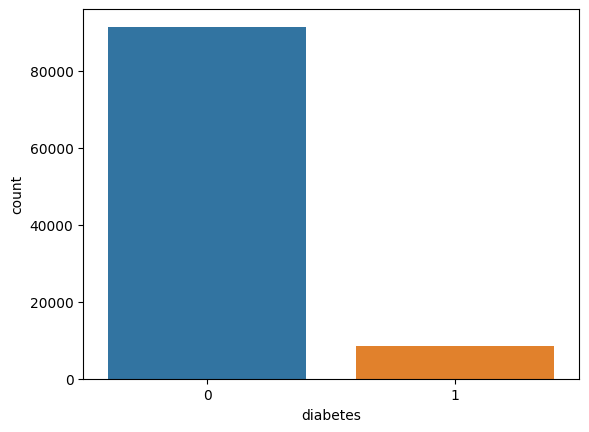

In [17]:
sns.countplot(x= 'diabetes', data= ds)

<Axes: xlabel='age', ylabel='Density'>

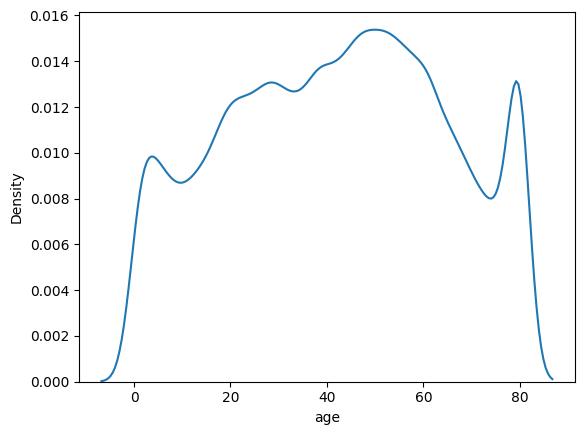

In [18]:
sns.kdeplot(x='age', data= ds)

<Axes: xlabel='hypertension', ylabel='count'>

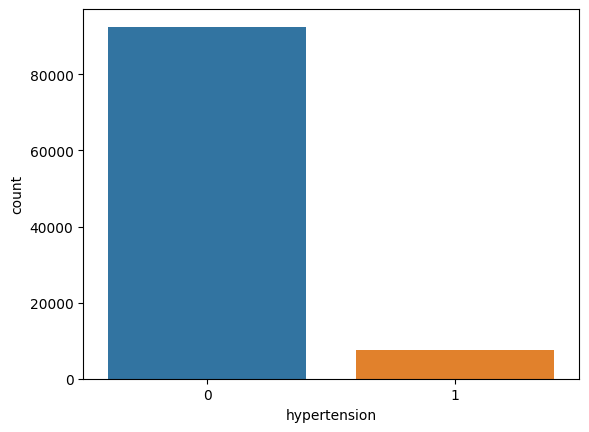

In [19]:
sns.countplot(x= 'hypertension', data=ds)

<Axes: xlabel='heart_disease', ylabel='count'>

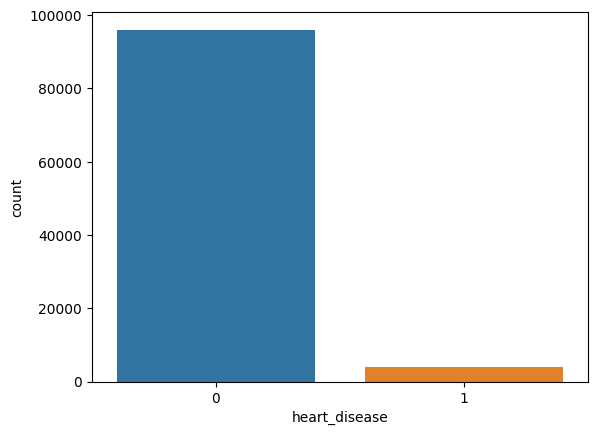

In [20]:
sns.countplot(x='heart_disease', data=ds)

<Axes: xlabel='bmi', ylabel='Density'>

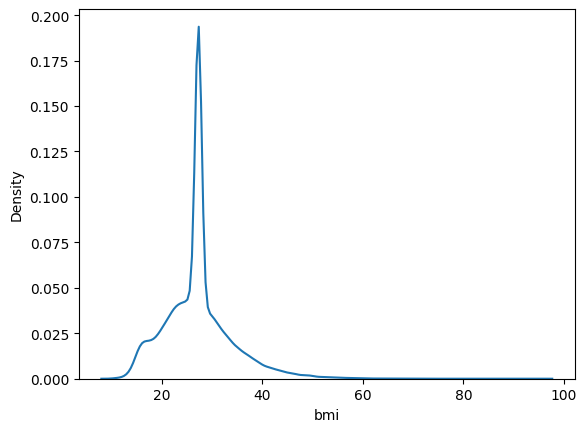

In [21]:
sns.kdeplot(x='bmi', data=ds)

<Axes: xlabel='HbA1c_level', ylabel='Density'>

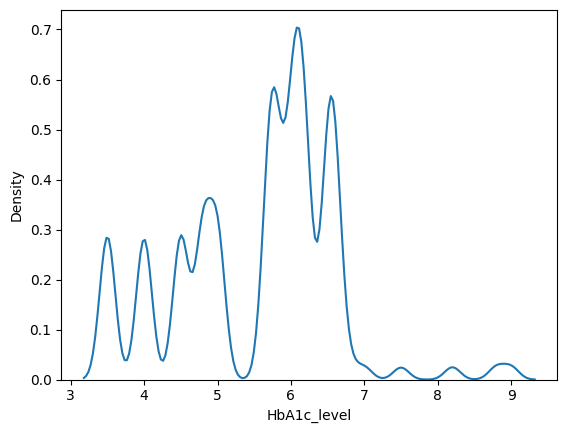

In [22]:
sns.kdeplot(x='HbA1c_level', data=ds)

<Axes: xlabel='blood_glucose_level', ylabel='Density'>

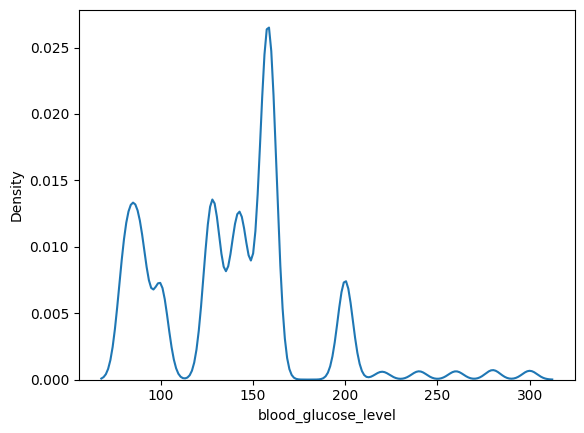

In [23]:
sns.kdeplot(x='blood_glucose_level', data=ds)

### Correlations between values and diabetes

<Axes: xlabel='age', ylabel='Density'>

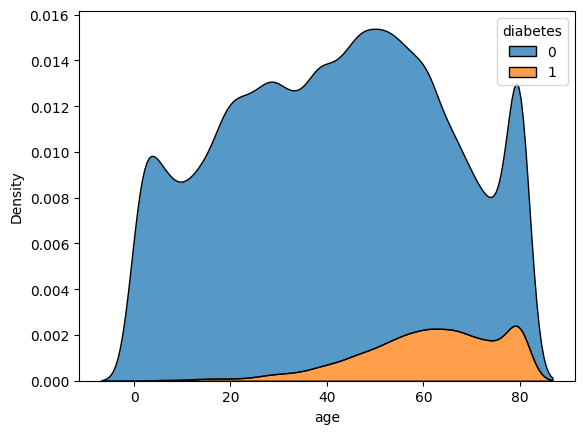

In [24]:
sns.kdeplot(x='age', hue='diabetes', multiple='stack', data=ds)

<Axes: xlabel='hypertension', ylabel='count'>

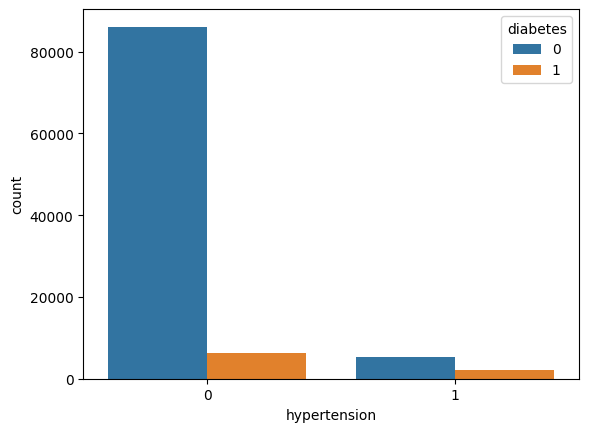

In [25]:
sns.countplot(x='hypertension', hue='diabetes', data=ds)

<Axes: xlabel='heart_disease', ylabel='count'>

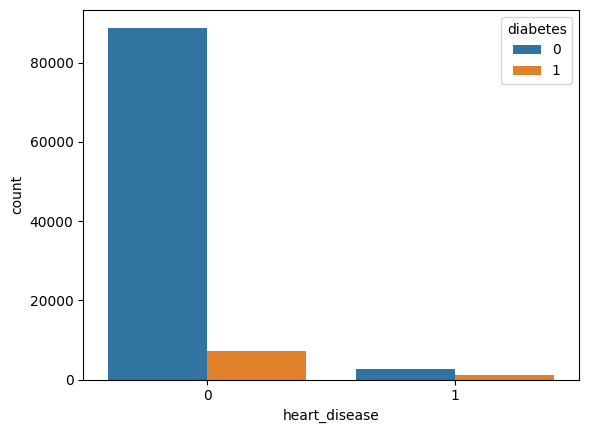

In [26]:
sns.countplot(x='heart_disease', hue='diabetes', data=ds)

<Axes: xlabel='bmi', ylabel='Density'>

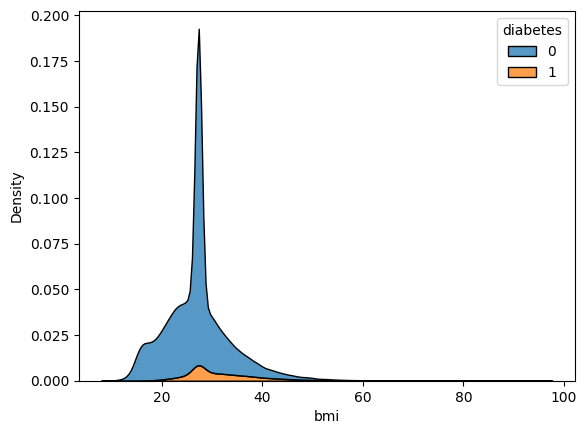

In [27]:
sns.kdeplot(x='bmi', hue='diabetes', multiple= 'stack', data=ds)

<Axes: xlabel='HbA1c_level', ylabel='Density'>

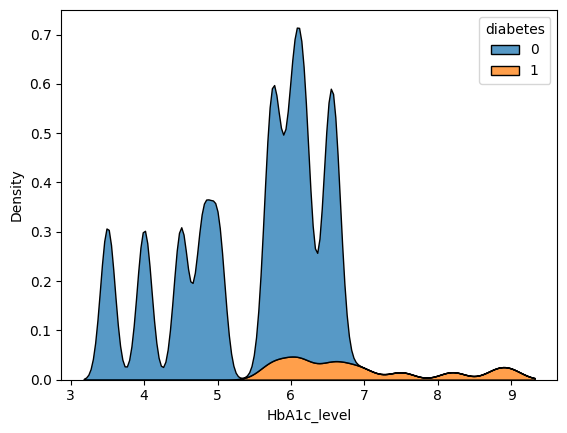

In [28]:
sns.kdeplot(x='HbA1c_level', hue='diabetes', multiple='stack', data=ds)

<Axes: xlabel='blood_glucose_level', ylabel='Density'>

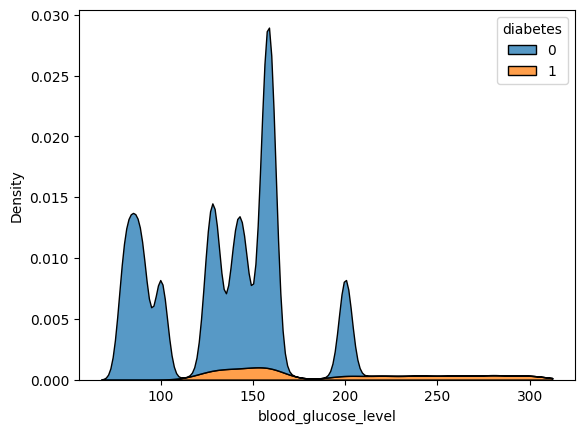

In [29]:
sns.kdeplot(x='blood_glucose_level', hue='diabetes', multiple='stack', data=ds)

### Exploratory Data Analysis (EDA)

In [30]:
ds.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.875660,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.535417,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


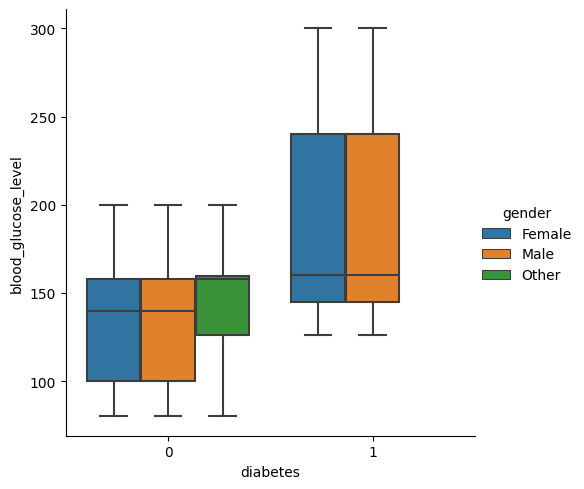

In [31]:
sns.catplot(data= ds, x= 'diabetes', y= 'blood_glucose_level', kind= 'box', hue= 'gender')
plt.show()

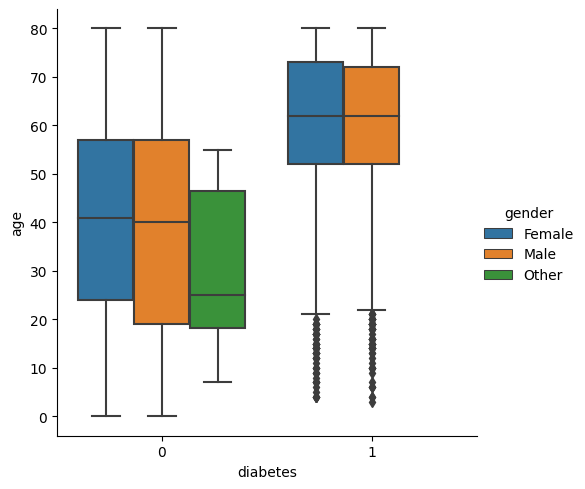

In [32]:
sns.catplot(data= ds, x= 'diabetes', y= 'age', kind= 'box', hue= 'gender')
plt.show()

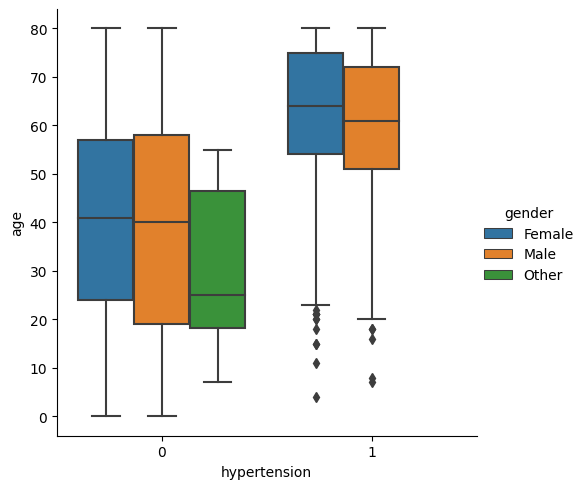

In [33]:
sns.catplot(data = ds, x = 'hypertension', y = 'age', kind = 'box', hue = 'gender')
plt.show()

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


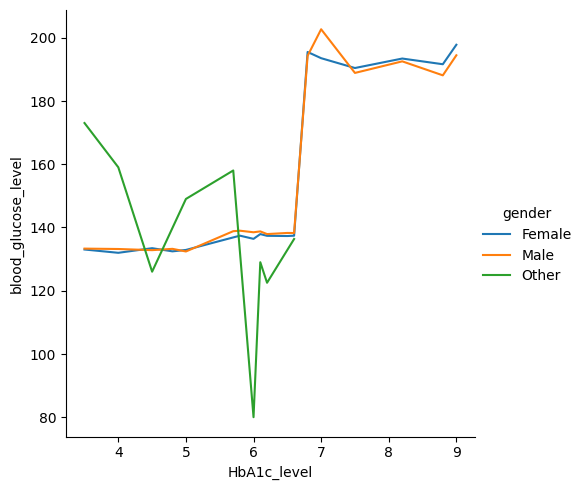

In [34]:
sns.relplot(data = ds, x = 'HbA1c_level', y =  'blood_glucose_level', kind = 'line', hue = 'gender', ci = None, markers = True)
plt.show()

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


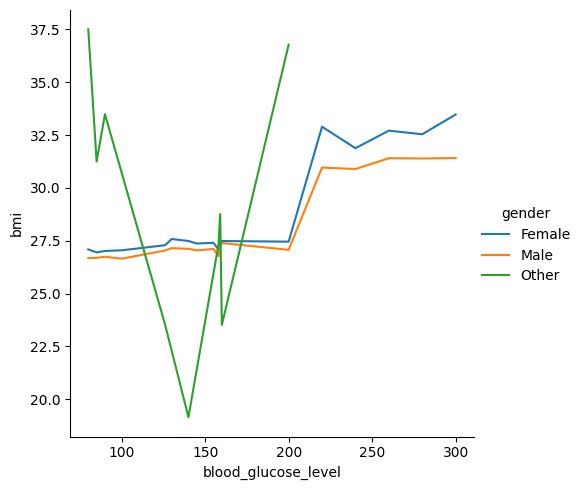

In [35]:
sns.relplot(data = ds, x = 'blood_glucose_level', y =  'bmi', kind = 'line', hue = 'gender', ci = None)
plt.show()

In [36]:
numeric_ds = ds.select_dtypes(include='number')

In [37]:
numeric_ds.corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251093,0.233254,0.337747,0.101328,0.110631,0.257933
hypertension,0.251093,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233254,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337747,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101328,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110631,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.257933,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


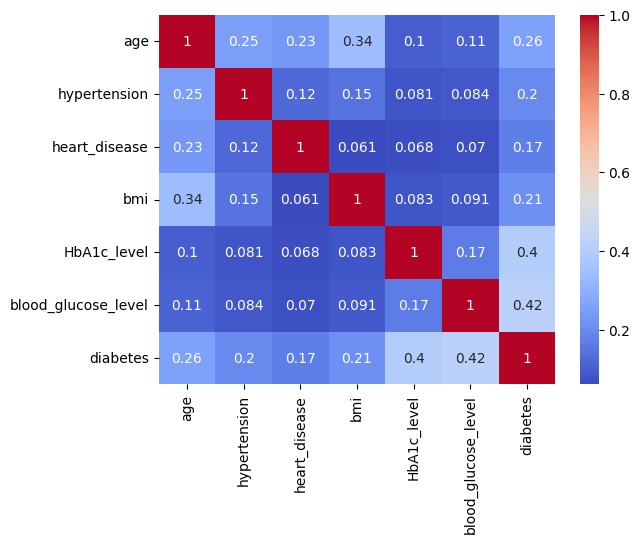

In [38]:
sns.heatmap(numeric_ds.corr(), annot = True, cmap = 'coolwarm')
plt.show()

- There is no clear visual indication of high correlation between the predictors (independent variables) in the dataset. 
- Still possible that multicollinearity exists
- All coefficient < 0.7, no high correlations

# (d) Data Preprocessing

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import time
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

In [40]:
# Create the feature matrix by selecting all columns except the last one ('diabetes')
feature_matrix = ds.iloc[:, :-1]

# Perform one-hot encoding for the 'gender' column
encoded_features = pd.get_dummies(feature_matrix, columns= ['gender'], drop_first=True)

# Create the target variable y
target_variable = ds.iloc[:, -1]

# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(encoded_features, target_variable, test_size=0.2, random_state=110)

In [41]:
feature_matrix

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,Female,80,0,1,25.19,6.6,140.0
1,Female,54,0,0,27.32,6.6,80.0
2,Male,28,0,0,27.32,5.7,158.0
3,Female,36,0,0,23.45,5.0,155.0
4,Male,76,1,1,20.14,4.8,155.0
...,...,...,...,...,...,...,...
99995,Female,80,0,0,27.32,6.2,90.0
99996,Female,2,0,0,17.37,6.5,100.0
99997,Male,66,0,0,27.83,5.7,155.0
99998,Female,24,0,0,35.42,4.0,100.0


In [42]:
scores = dict()
time_models = dict()
f1= dict()

# Creating dictionaries

### Model 1: Logistic Regression

In [43]:
#Since there is no correlation among the 8 predictors used in Logistic Regression, there is no need to perform feature selection
t0 = time.time()

# Train the Logistic Regression model
lr_model = LogisticRegression(solver='liblinear', random_state=110).fit(train_X, train_y)

t1 = time.time()
model_running_time = t1 - t0
print('Model Running Time:', model_running_time)

# Calculate the accuracy of the Logistic Regression model
lr_score = lr_model.score(test_X, test_y)
scores['Logistic Regression'] = lr_score
print('Accuracy of Linear Regression model:', lr_score)

# Store the running time and F1 score of the Logistic Regression model
time_models['Logistic Regression'] = model_running_time
f1['Logistic Regression'] = f1_score(test_y, lr_model.predict(test_X))

Model Running Time: 0.36715054512023926
Accuracy of Linear Regression model: 0.9607


### Model 2: Linear Support Vector Machine (LSVM)

In [44]:
t0 = time.time()

# Train the Linear Support Vector Machine model
svm_model = LinearSVC(dual=False, random_state=110).fit(train_X, train_y)

t1 = time.time()
model_running_time = t1 - t0
print('Model Running Time:', model_running_time)

# Calculate and store the running time of the Linear Support Vector Machine model
time_models['Linear Support Vector Machine'] = model_running_time

# Calculate and store the accuracy score of the Linear Support Vector Machine model
score = svm_model.score(test_X, test_y)
scores['Linear Support Vector Machine'] = score
print('Accuracy of LSVM model: ', score)

# Calculate and store the F1 score of the Linear Support Vector Machine model
f1_score_value = f1_score(test_y, svm_model.predict(test_X))
f1['Linear Support Vector Machine'] = f1_score_value

Model Running Time: 0.31281089782714844
Accuracy of LSVM model:  0.96125


### Model 3: Random Forest Model

In [45]:
from sklearn.ensemble import RandomForestClassifier

t0 = time.time()

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=30, min_samples_leaf=8, max_features='sqrt', max_depth=5, random_state=110).fit(train_X, train_y)

t1 = time.time()
model_running_time = t1 - t0
print('Model Running Time:', model_running_time)

# Calculate and store the running time of the Random Forest model
time_models['Random Forest'] = model_running_time

# Calculate and store the accuracy score of the Random Forest model
score = rf_model.score(test_X, test_y)
scores['Random Forest'] = score
print('Accuracy of Random Forest model: ', score)

# Calculate and store the F1 score of the Random Forest model
f1_score_value = f1_score(test_y, rf_model.predict(test_X))
f1['Random Forest'] = f1_score_value

Model Running Time: 0.6973485946655273
Accuracy of Random Forest model:  0.97185


### Model 4: Adaptive Boosting (AdaBoost)
##### consider as an algorithm, not a model

In [46]:
"""""
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

paras_ada = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 1.2, 1.4, 2, 3]}

# GridSearchCV for AdaBoost with specified parameters
grid = GridSearchCV(AdaBoostClassifier(n_estimators=100), paras_ada)
grid.fit(train_X, train_y)

# Print the best parameters found by GridSearchCV
print('Best Parameters:', grid.best_params_)
"""""
# try performing a grid search for the AdaBoost classifier
# these code makes my laptop laggy

'""\nfrom sklearn.ensemble import AdaBoostClassifier\nfrom sklearn.model_selection import GridSearchCV\n\nparas_ada = {\'learning_rate\': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 1.2, 1.4, 2, 3]}\n\n# GridSearchCV for AdaBoost with specified parameters\ngrid = GridSearchCV(AdaBoostClassifier(n_estimators=100), paras_ada)\ngrid.fit(train_X, train_y)\n\n# Print the best parameters found by GridSearchCV\nprint(\'Best Parameters:\', grid.best_params_)\n'

In [47]:
t0 = time.time()
ada_model = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=110).fit(train_X, train_y)
t1 = time.time()
model_running_time = t1 - t0
print('Model Running Time:', model_running_time)
time_models['Ada Boost'] = model_running_time

f1_score_value = f1_score(test_y, ada_model.predict(test_X))
f1['Ada Boost'] = f1_score_value

score = ada_model.score(test_X, test_y)
print('Accuracy of AdaBoost: ', score)
scores['Ada Boost'] = score

Model Running Time: 4.950165033340454
Accuracy of AdaBoost:  0.9724


# (e) Model Result Comparison, Finalise and Summarise

In [48]:
# Accessing the dictionaries
print("Model scores:")
for model, score in scores.items():
    print(f"{model}: {score:.4f}")

Model scores:
Logistic Regression: 0.9607
Linear Support Vector Machine: 0.9613
Random Forest: 0.9718
Ada Boost: 0.9724


In [49]:
print("Model running time:")
for model, time_model in time_models.items():
    print(f"{model}: {time_model:.6f}s") 

Model running time:
Logistic Regression: 0.367151s
Linear Support Vector Machine: 0.312811s
Random Forest: 0.697349s
Ada Boost: 4.950165s


In [50]:
print("F1 scores:")
for model, f1_score in f1.items():
    print(f"{model}: {f1_score:.6f}")

F1 scores:
Logistic Regression: 0.719286
Linear Support Vector Machine: 0.718693
Random Forest: 0.796971
Ada Boost: 0.803279


In [51]:
from tabulate import tabulate

model_names = list(scores.keys())
model_scores = list(scores.values())
model_times = list(time_models.values())
model_f1 = list(f1.values())

# Sort the data based on scores in descending order
sorted_data = sorted(zip(model_names, model_scores, model_times, model_f1), key=lambda x: x[1], reverse=True)

# Extract the sorted values into separate lists
sorted_model_names, sorted_model_scores, sorted_model_times, sorted_model_f1 = zip(*sorted_data)

data = []
for i in range(len(sorted_model_names)):
    data.append([sorted_model_names[i], sorted_model_scores[i], sorted_model_times[i], sorted_model_f1[i]])

print(tabulate(data, headers=["Models", "Scores", "Time", "F1"], floatfmt=".5f"))

Models                           Scores     Time       F1
-----------------------------  --------  -------  -------
Ada Boost                       0.97240  4.95017  0.80328
Random Forest                   0.97185  0.69735  0.79697
Linear Support Vector Machine   0.96125  0.31281  0.71869
Logistic Regression             0.96070  0.36715  0.71929


- Adaboost Model is the best model among the 4 models
- Has the highest accuracy (0.97240) and the highest F1 score (0.80238)
- time taken: 4.95017